In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from google.colab import files
import os
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [ ]:
dirname = '/content/drive/MyDrive/chessman/Chessman-image-dataset'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]
print(dir_chess_folders)
print(dir_chess_paths)

['Knight', 'Bishop', 'King', 'Pawn', 'Queen', 'Rook']
['/content/drive/MyDrive/chessman/Chessman-image-dataset/Knight', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Bishop', '/content/drive/MyDrive/chessman/Chessman-image-dataset/King', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Pawn', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Queen', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Rook']


In [ ]:
labels = dir_chess_folders
labels

['Knight', 'Bishop', 'King', 'Pawn', 'Queen', 'Rook']

In [ ]:
img_size_h = 300
img_size_w = 300

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30, 
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

input_shape = (img_size_h, img_size_w, 3) 
epoch = 80
train_generator = train_datagen.flow_from_directory(
    directory=dirname,
    target_size=(img_size_h, img_size_w),
    subset='training',
    class_mode="sparse",
    shuffle=True, 
    seed=8)

validation_generator = train_datagen.flow_from_directory(
    directory=dirname,
    target_size=(img_size_h, img_size_w),
    subset='validation',
    class_mode="sparse",
    shuffle=True,
    seed=8)

Found 341 images belonging to 6 classes.
Found 142 images belonging to 6 classes.


Using Pre-trained Model 'InceptionResNetV2' trained on 'Imagenet' Dataset

In [ ]:
pre_trained_model= InceptionResNetV2(input_shape=(img_size_w, img_size_h,3),
                              include_top=False,
                              weights='imagenet')

219062272/219055592 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.trainable = False

In [ ]:
# Building a Model
model1=Sequential()
model1.add(pre_trained_model)
model1.add(layers.Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(keras.layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(keras.layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(keras.layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(Dense(6, activation='softmax'))

model1.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 98304)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               50332160  
_________________________________________________________________
batch_normalization_203 (Bat (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_204 (Bat (None, 256)               1

In [ ]:
r = model1.fit(
    train_generator, epochs=epoch, validation_data=validation_generator
)

Epoch 1/80
11/11 [==============================] - 199s 16s/step - loss: 2.8232 - acc: 0.1906 - val_loss: 6.0984 - val_acc: 0.2324
Epoch 2/80
11/11 [==============================] - 16s 1s/step - loss: 2.5648 - acc: 0.1848 - val_loss: 3.6137 - val_acc: 0.3028
Epoch 3/80
11/11 [==============================] - 16s 1s/step - loss: 2.5264 - acc: 0.2141 - val_loss: 2.4223 - val_acc: 0.2113
Epoch 4/80
11/11 [==============================] - 16s 1s/step - loss: 2.4918 - acc: 0.2111 - val_loss: 2.1060 - val_acc: 0.2676
Epoch 5/80
11/11 [==============================] - 16s 1s/step - loss: 2.3417 - acc: 0.2317 - val_loss: 1.9052 - val_acc: 0.3239
Epoch 6/80
11/11 [==============================] - 16s 1s/step - loss: 2.3187 - acc: 0.2375 - val_loss: 1.7559 - val_acc: 0.3169
Epoch 7/80
11/11 [==============================] - 16s 1s/step - loss: 2.1834 - acc: 0.2903 - val_loss: 1.6379 - val_acc: 0.3380
Epoch 8/80
11/11 [==============================] - 16s 1s/step - loss: 2.2494 - acc: 0.

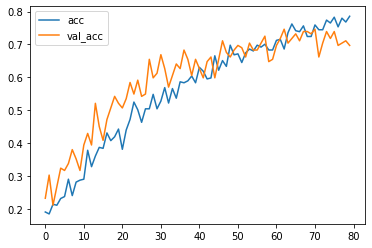

In [ ]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend();

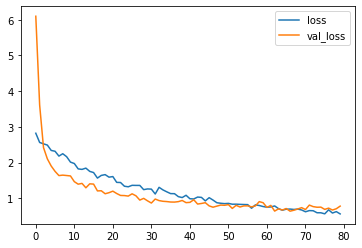

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [ ]:
score = model1.evaluate(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 5s 931ms/step - loss: 0.7884 - acc: 0.6901
Test loss: 0.7884079813957214
Test accuracy: 0.6901408433914185


Model was ablw to attain maximum training accuracy of 78.6 % and maximum Test accuracy of 74.6 %.

We can try performing hyperparameter tuning or using some other pretrained model to increase the accuracy of the model.